Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "ALLTHEA GRACE CONCHA"
COLLABORATORS = "GEORGE CRUZ"

---

# Laboratory 6: Network Analysis EDA


Reference Data: https://www.kaggle.com/datasets/kaggle/recipe-ingredients-dataset <br>

Networkx Documentation: https://networkx.org/documentation/stable/reference/index.html <br>

https://networkx.org/documentation/stable/auto_examples/drawing/plot_weighted_graph.html


In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import json
import pandas as pd

### Instructions

**Data Loading**<br>
1. Load the json via into a Pandas DataFrame with the columns `id`, `cuisine`, and `ingredients`.

**Preliminary EDA**<br>

2. Make a bar graph counting all of the occurence of `ingredients` in the dataset. Sort the top 20 ingredients in terms of count. <br>

3. Make a bar graph counting all of the occurence of `cuisine`.

**Network Graph**<br>
4. Make a network graph of the dataset. It can be among of the following.
 - Make a bipartite graph of `cuisine` and `ingredients`
 - A network graph of the `ingredients`
 - A network graph of the `cuisine`
 
**Insights**<br>
5. Make an insight based on your Network Graph


In [3]:
# Opening JSON file
f = open('train.json')
 
# returns JSON object as 
# a dictionary
data = json.load(f)

In [4]:
G = nx.Graph()

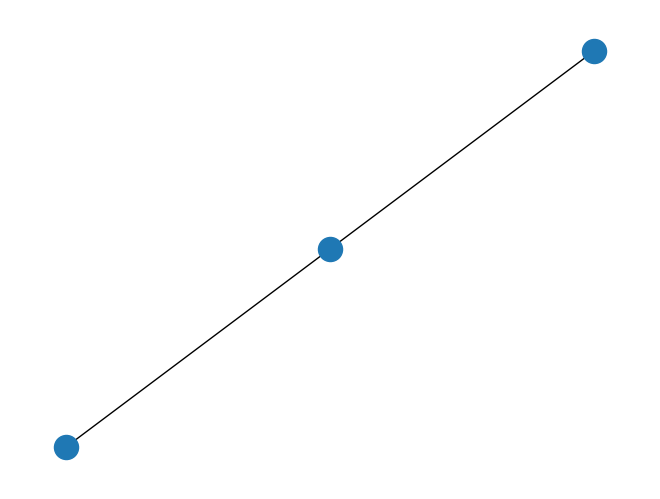

In [5]:
G.add_edge(1,2)
G.add_edge(2,3)
nx.draw(G)

{('a', 'b'): Text(-0.7681487567110847, 0.3618072550923697, '0.6'),
 ('a', 'c'): Text(-0.05228636436497752, 0.06078533445996674, '0.2'),
 ('a', 'd'): Text(-0.5138611902635294, -0.10295220830144139, '0.3'),
 ('c', 'd'): Text(-0.029850041206337413, -0.24132784146632047, '0.1'),
 ('c', 'e'): Text(0.6154848791443639, -0.2781469565309216, '0.7'),
 ('c', 'f'): Text(0.6142387034652727, 0.08007724419996018, '0.9')}

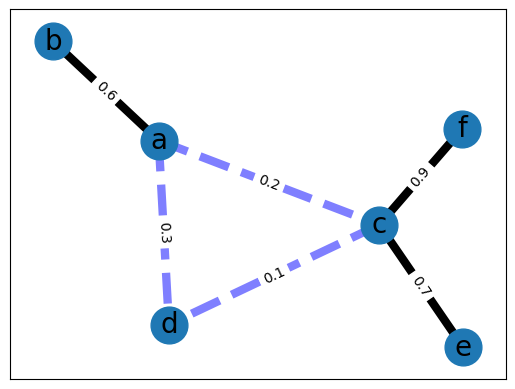

In [6]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()

G.add_edge("a", "b", weight=0.6)
G.add_edge("a", "c", weight=0.2)
G.add_edge("c", "d", weight=0.1)
G.add_edge("c", "e", weight=0.7)
G.add_edge("c", "f", weight=0.9)
G.add_edge("a", "d", weight=0.3)

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
)

# node labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

## Data Loading

In [7]:
recipe = pd.read_json('train.json')
recipe.head()

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


## Preliminary EDA

### Ingredients

In [8]:
all_ingredients = [] # list to store all ingredients
for indiv_ingredient_list in recipe['ingredients'].values:
    for ingredient in indiv_ingredient_list:
        all_ingredients.append(ingredient)

In [9]:
ing_tg = pd.DataFrame(all_ingredients)
ing_tg

,0
0,romaine lettuce
1,black olives
2,grape tomatoes
3,garlic
4,pepper
...,...
428270,garlic
428271,white sugar
428272,roma tomatoes
428273,celery


In [10]:
ing_tg.value_counts()[0:20] #displays the top 20 ingredients

salt                   18049
olive oil               7972
onions                  7972
water                   7457
garlic                  7380
sugar                   6434
garlic cloves           6237
butter                  4848
ground black pepper     4785
all-purpose flour       4632
pepper                  4438
vegetable oil           4385
eggs                    3388
soy sauce               3296
kosher salt             3113
green onions            3078
tomatoes                3058
large eggs              2948
carrots                 2814
unsalted butter         2782
dtype: int64

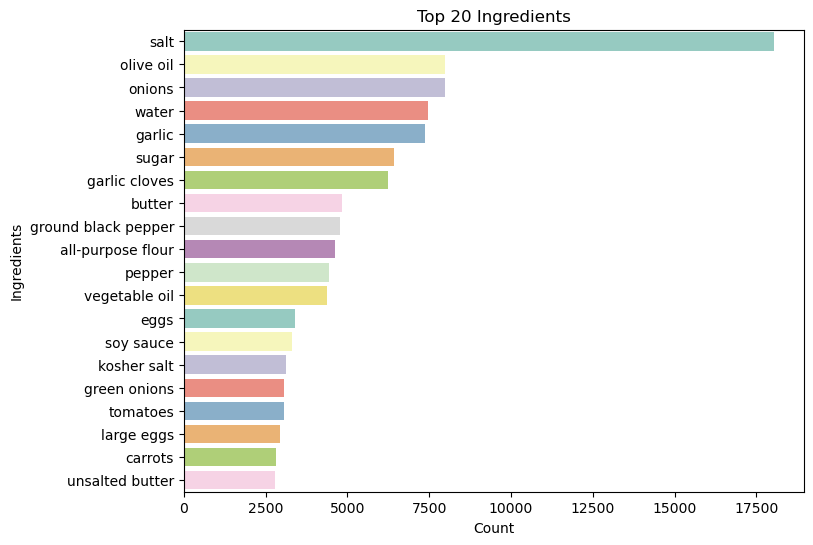

In [11]:
import seaborn as sns

# Your code to prepare the data
x = ing_tg.value_counts()[:20].index.tolist()
y = ing_tg.value_counts()[:20].values
x = [item[0] for item in x]

# Convert x to a list
x = list(map(str, x))

# Create a horizontal bar graph using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=y, y=x, orient='h', palette='Set3')

# Add labels and a title
plt.xlabel('Count')
plt.ylabel('Ingredients')
plt.title('Top 20 Ingredients')

plt.show()

### Cuisine

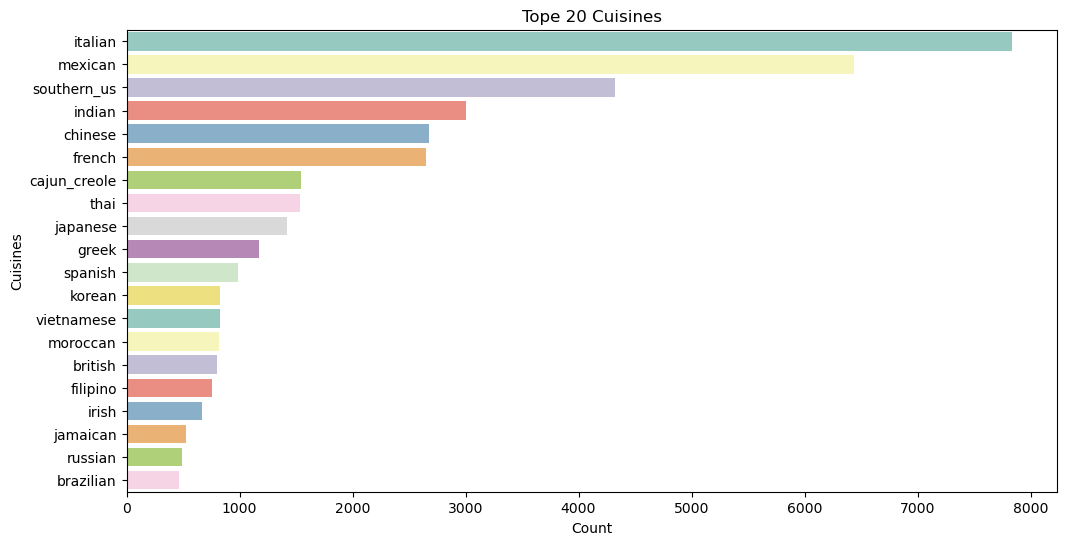

In [12]:
cuisine_counts = recipe['cuisine'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=cuisine_counts.values, y=cuisine_counts.index, orient='h', palette='Set3')
plt.xlabel('Count')
plt.ylabel('Cuisines')
plt.title('Tope 20 Cuisines')
plt.show()

## Network Graph

### A network graph of the cuisine

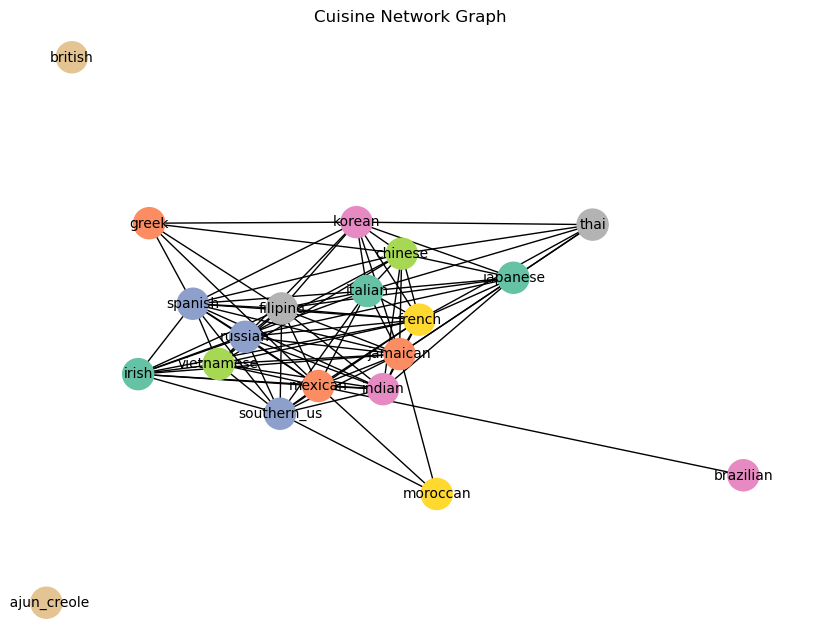

In [14]:
# Create a DataFrame with unique cuisine pairs
cuisine_pairs = recipe['cuisine'].value_counts().reset_index()
cuisine_pairs.columns = ['cuisine', 'count']

# Create a network graph
G = nx.Graph()

# Add nodes for cuisines
for cuisine in cuisine_pairs['cuisine']:
    G.add_node(cuisine)

# Iterate through the cuisine pairs and add edges to the graph
for i in range(len(cuisine_pairs)):
    for j in range(i + 1, len(cuisine_pairs)):
        cuisine1 = cuisine_pairs.iloc[i]['cuisine']
        cuisine2 = cuisine_pairs.iloc[j]['cuisine']
        common_count = len(set(recipe[recipe['cuisine'] == cuisine1]['ingredients'].values[0]) & set(recipe[recipe['cuisine'] == cuisine2]['ingredients'].values[0]))
        if common_count > 0:
            G.add_edge(cuisine1, cuisine2, weight=common_count)

# Define a color palette
custom_palette = sns.color_palette("Set2", len(G.nodes))

# Draw the network graph with node colors from the palette
pos = nx.spring_layout(G, k=0.9)  # Adjust the 'k' parameter for better spacing
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_color=custom_palette, node_size=500, font_size=10, font_color='black')
plt.title('Cuisine Network Graph')
plt.show()

**South East Asian Cuisines:** Chinese, Korean, Japanese, and Thai cuisines are closely connected due to shared taste preferences and the use of similar spices common in that region.<br>

**Filipino and Spanish Cuisines:** Filipino cuisine is related to Spanish cuisine, likely because the Philippines was once a Spanish colony, resulting in a historical influence on Filipino culinary elements.<br>

**Filipino and Indian Cuisines:** Filipino cuisine exhibits similarities with Indian cuisine, possibly due to the influence of Indian spices on Filipino culinary traditions.<br>

**Vietnamese Cuisine:** Vietnamese cuisine shares connections with Filipino and Spanish cuisines, likely due to geographical proximity and historical interactions.<br>

**Russian and French Cuisines:** Russian and French cuisines are close to each other, indicating shared culinary elements or influences.<br>

**Southern US, Jamaican, and Italian Cuisines:** These cuisines are grouped, suggesting common ingredients or shared culinary characteristics.<br>

**Mexican and Brazilian Cuisines:** Mexican cuisine connects with Brazilian cuisine, indicating a potential culinary relationship.<br>

**Moroccan Cuisine:** Moroccan cuisine is linked to Mexican, Southern US, and Jamaican cuisines, suggesting shared ingredients or culinary influences.<br>

**Greek Cuisine**  Greek cuisine connects with Irish, Spanish, Vietnamese, Chinese, and Korean cuisines, highlighting its versatility and adaptability to different culinary traditions.<br>

**British and Cajun and Creole Cuisines:** British and Cajun and Creole cuisines stand apart and does not share many ingredients with other cuisines, indicating a distinct taste preference.